# JSON and APIs

_November 3, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [1]:
import pandas as pd
import numpy as np
import requests #allows you to send a get request to python and get responses back
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model

The  part of the server that allows tech to interact with each other; one app can communicate with another. 
Ex. At a restaurant you dont just go directly to the chef in thekitchen, you talk to the weaistress. 
The waistress is the API and the restaurant is the server. And you are the browser.

API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

# what happened here?
# you get a 400 error which is a client enrror...
# ...you need a key

400

In [9]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

MY_API_KEY = "kuM4_cnu3bwlJJD5wBclWFoLOr9O7yCoSOfjMBFnEm88XCjRW3uZ0BuS78pz0Zyna3dN076s172aLYgzLzvEACKf601qSgBMfh7o0ImQubAqJdpVHWgQUdAV6MSiX3Yx"


term = 'Art'
location = 'New York'
SEARCH_LIMIT = 30

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [10]:
response.status_code

200

In [8]:
# examine the response object

print(response)


<Response [200]>


In [11]:
# how are we going to parse the response.text object?
# you get one long string
response.text
# next, you need to implement json library which allows you
# to interact with data in that format very flexily

'{"businesses": [{"id": "OjrvmFqhVJR9eLf2nCIrgA", "alias": "arete-beauty-spa-nail-de-vue-flushing-5", "name": "Arete Beauty Spa-Nail De Vue", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/UBt3EwHjV7fwlG_pzvIUJg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/arete-beauty-spa-nail-de-vue-flushing-5?adjust_creative=wl8Bb2FBEfvomzf_WlAddQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=wl8Bb2FBEfvomzf_WlAddQ", "review_count": 223, "categories": [{"alias": "othersalons", "title": "Nail Salons"}, {"alias": "eyelashservice", "title": "Eyelash Service"}, {"alias": "eyebrowservices", "title": "Eyebrow Services"}], "rating": 4.5, "coordinates": {"latitude": 40.7606237, "longitude": -73.8332025}, "transactions": [], "price": "$$", "location": {"address1": "133-46 37th Ave", "address2": "2FL", "address3": "", "city": "Flushing", "zip_code": "11354", "country": "US", "state": "NY", "display_address": ["133-46 37th Ave", "2FL", "Flushing, NY 11354"]}, "pho

In [14]:
# takes in a json file and outputs a python dictionary. 
# json.load()

# gives us a dictionary
# takes in a long string ang returns a dictionary
# json.loads()

json.loads(response.text)

{'businesses': [{'id': 'OjrvmFqhVJR9eLf2nCIrgA',
   'alias': 'arete-beauty-spa-nail-de-vue-flushing-5',
   'name': 'Arete Beauty Spa-Nail De Vue',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/UBt3EwHjV7fwlG_pzvIUJg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/arete-beauty-spa-nail-de-vue-flushing-5?adjust_creative=wl8Bb2FBEfvomzf_WlAddQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=wl8Bb2FBEfvomzf_WlAddQ',
   'review_count': 223,
   'categories': [{'alias': 'othersalons', 'title': 'Nail Salons'},
    {'alias': 'eyelashservice', 'title': 'Eyelash Service'},
    {'alias': 'eyebrowservices', 'title': 'Eyebrow Services'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.7606237, 'longitude': -73.8332025},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '133-46 37th Ave',
    'address2': '2FL',
    'address3': '',
    'city': 'Flushing',
    'zip_code': '11354',
    'country': 'US',
    'state': 'NY',
    'di

In [15]:
type(json.loads(response.text))

dict

In [16]:
# working with JSON
# create the object so it's easir to work with
art = response.text
art = json.loads(art)

In [17]:
# the structure is key:value which is a list of each of the business
art

{'businesses': [{'id': 'OjrvmFqhVJR9eLf2nCIrgA',
   'alias': 'arete-beauty-spa-nail-de-vue-flushing-5',
   'name': 'Arete Beauty Spa-Nail De Vue',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/UBt3EwHjV7fwlG_pzvIUJg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/arete-beauty-spa-nail-de-vue-flushing-5?adjust_creative=wl8Bb2FBEfvomzf_WlAddQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=wl8Bb2FBEfvomzf_WlAddQ',
   'review_count': 223,
   'categories': [{'alias': 'othersalons', 'title': 'Nail Salons'},
    {'alias': 'eyelashservice', 'title': 'Eyelash Service'},
    {'alias': 'eyebrowservices', 'title': 'Eyebrow Services'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.7606237, 'longitude': -73.8332025},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '133-46 37th Ave',
    'address2': '2FL',
    'address3': '',
    'city': 'Flushing',
    'zip_code': '11354',
    'country': 'US',
    'state': 'NY',
    'di

In [18]:
# cleaning and exploring the data
for key in art.keys():
    print(key)

businesses
total
region


In [21]:
# explore which objects in the dataframe we need
art['businesses'][0]
# businesses is the best one to analyze and turn it into a df

{'id': 'OjrvmFqhVJR9eLf2nCIrgA',
 'alias': 'arete-beauty-spa-nail-de-vue-flushing-5',
 'name': 'Arete Beauty Spa-Nail De Vue',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/UBt3EwHjV7fwlG_pzvIUJg/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/arete-beauty-spa-nail-de-vue-flushing-5?adjust_creative=wl8Bb2FBEfvomzf_WlAddQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=wl8Bb2FBEfvomzf_WlAddQ',
 'review_count': 223,
 'categories': [{'alias': 'othersalons', 'title': 'Nail Salons'},
  {'alias': 'eyelashservice', 'title': 'Eyelash Service'},
  {'alias': 'eyebrowservices', 'title': 'Eyebrow Services'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.7606237, 'longitude': -73.8332025},
 'transactions': [],
 'price': '$$',
 'location': {'address1': '133-46 37th Ave',
  'address2': '2FL',
  'address3': '',
  'city': 'Flushing',
  'zip_code': '11354',
  'country': 'US',
  'state': 'NY',
  'display_address': ['133-46 37th Ave', '2FL', 'Flushing, NY 1

In [22]:
art['total']
# total num ofbusimesses

13700

In [23]:
# returns a location, giving long and lat
art['region']

{'center': {'longitude': -73.99429321289062, 'latitude': 40.70544486444615}}

In [26]:
# let's turn the things we need into a pandas dataframe
# Where the info some fromt he value corresponing to the businesses key
# where each business is on a row and the attributes to be a column
art_df = pd.DataFrame(art['businesses'])
art_df.to_csv('art_info')
art_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,OjrvmFqhVJR9eLf2nCIrgA,arete-beauty-spa-nail-de-vue-flushing-5,Arete Beauty Spa-Nail De Vue,https://s3-media3.fl.yelpcdn.com/bphoto/UBt3Ew...,False,https://www.yelp.com/biz/arete-beauty-spa-nail...,223,"[{'alias': 'othersalons', 'title': 'Nail Salon...",4.5,"{'latitude': 40.7606237, 'longitude': -73.8332...",[],$$,"{'address1': '133-46 37th Ave', 'address2': '2...",+16468817895,(646) 881-7895,14895.641664
1,xoiOXTbqQqrveY8DTIpZDw,bushwick-collective-brooklyn-2,Bushwick Collective,https://s3-media2.fl.yelpcdn.com/bphoto/DOW9ae...,False,https://www.yelp.com/biz/bushwick-collective-b...,42,"[{'alias': 'publicart', 'title': 'Public Art'}]",5.0,"{'latitude': 40.7076298, 'longitude': -73.9218...",[],NaN,{'address1': 'Troutman St At Saint Nicholas Av...,,,6114.842745
2,y8wMTCN3p9wOa3AF9Zkd6g,arcadia-earth-new-york,Arcadia Earth,https://s3-media4.fl.yelpcdn.com/bphoto/Uhss-c...,False,https://www.yelp.com/biz/arcadia-earth-new-yor...,86,"[{'alias': 'galleries', 'title': 'Art Gallerie...",4.0,"{'latitude': 40.72906, 'longitude': -73.99353}",[],$$,"{'address1': '718 Broadway', 'address2': None,...",,,2617.507582
3,jVncyqXwlx_D9f2xZn05tg,the-metropolitan-museum-of-art-new-york-3,The Metropolitan Museum of Art,https://s3-media3.fl.yelpcdn.com/bphoto/oqhwmy...,False,https://www.yelp.com/biz/the-metropolitan-muse...,2906,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,"{'latitude': 40.779449, 'longitude': -73.963245}",[],NaN,"{'address1': '1000 5th Ave', 'address2': '', '...",+12125357710,(212) 535-7710,8634.601734
4,OUPyV2WKYETuprScXSAtuA,the-museum-of-modern-art-new-york-3,The Museum of Modern Art,https://s3-media4.fl.yelpcdn.com/bphoto/FwsEEy...,False,https://www.yelp.com/biz/the-museum-of-modern-...,1991,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,"{'latitude': 40.761441, 'longitude': -73.977625}",[],NaN,"{'address1': '11 West 53rd St', 'address2': ''...",+12127089400,(212) 708-9400,6382.905321


Text(0, 0.5, 'Review Count')

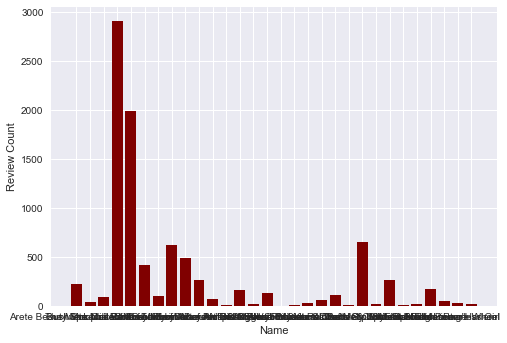

In [77]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot?
plt.bar(art_df['name'], height = art_df['review_count'], color = 'maroon');
plt.xlabel('Name')
plt.ylabel('Review Count')
# plt.title('Art Businesses Review Count')

### use the yelp api, make some requests, get it ack, and run some queries

 look into .gitignore to specify what file i want to ignore when i git add, git commit, and git push
 
 look into geopandas

In [ ]:
# query the name of the axe throwing place with the highest review


In [ ]:
# migrate the cleaned data into a sql db

In [ ]:
# can you do some other queries using sql/pandas?

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)